# Analiza danych wielowymiarowych

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy import stats
from scipy.stats import multivariate_normal

#Rozkład wielomianowy
Zmienna losowa $(X_1, X_2, \ldots, X_k)$ ma rozkład wielomianowy, jeżeli 
\begin{equation*}
    P(X_1=n_1, \ldots, X_k=n_k)=\frac{n!}{n_1!\cdot\ldots\cdot n_k!}p_1^{n_1}\cdot\ldots\cdot p_k^{n_k},
\end{equation*}
gdzie $p_i\in(0,1)$, $i=1,2,\ldots, k$, $p_1+p_2+\ldots+p_k=1$, $n_1+n_2+\ldots+n_k=n$.

Rozkład wielomianowy jest uogólnieniem rozkładu dwumianowego i opisuje rozkład wyników przy $n$-krotnym powtórzeniu doświadczenia o $k$ możliwych rezultatach. 

$X_i$ oznacza liczbę wyników $i$-tego typu w serii.

Rozkład wielomianowy można wykorzystać do obliczenia prawdopodobieństwa w sytuacjach, w których istnieją więcej niż dwa możliwe wyniki.

## Zadanie 1 - Rozkład wielomianowy

1. Zdefiniuj zmienną losową dla rozkładu wielomianowego (`stats.multinomial`).
2. Wygeneruj $n$ punktów z zaproponowanego rozkładu wielomianowego, narysuj histogramy.
2. Oblicz: w pewnym mieście 40% uprawnionych do głosowania popiera kandydata A, 10% popiera kandydata B, a pozostałe 50% nie ma preferencji. Wybieramy losowo 10 uprawnionych do głosowania. Jakie jest prawdopodobieństwo, że 4 z nich popiera kandydata A, 1 popiera kandydata B, a pozostałe 5 nie będzie miało preferencji?

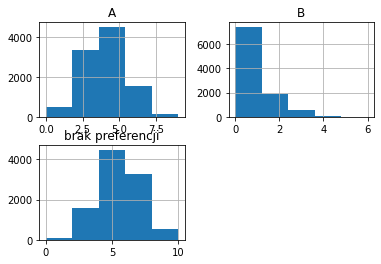

In [7]:
#1
multi10 = stats.multinomial(10,[0.4,0.1,0.5])
x = pd.DataFrame(multi10.rvs(10000),columns = ['A','B','brak preferencji'])
x.hist(bins = 5)
plt.show()

In [6]:
multi10.pmf([4,1,5])

0.10080000000000021

#Rozkład dwuwymiarowy normalny
Zmienna losowa $(X, Y)$ ma rozkład dwuwymiarowy normalny z parametrami $\mu_X$, $\mu_Y$, $\sigma_X>0$, $\sigma_Y>0$ oraz $\rho\in(-1,1)$, jeżeli jej gęstość $f$ wyraża się wzorem
\begin{equation*}
    f(x, y) = \frac{1}{2\pi \sigma_X \sigma_Y\sqrt{1-\rho^2}} \exp\Bigg\{-\frac{1}{2(1-\rho^2)}\Bigg[\frac{(x-\mu_X)^2}{\sigma^2_X} - 2\rho\frac{(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y} + \frac{(y-\mu_Y)^2}{\sigma^2_Y} \Bigg] \Bigg\}.
\end{equation*}

\pause
\textit{Jeżeli dwuwymiarowa zmienna losowa $(X, Y)$ ma rozkład normalny, to zmienne losowe $X$ i $Y$ mają, odpowiednio, jednowymiarowe rozkłady normalne $\mathcal{N}(\mu_X, \sigma_X)$~i~$\mathcal{N}(\mu_Y, \sigma_Y)$.}

## Zadanie 2 - Dwuwymiarowy rozkład normalny
1. Zdefiniuj zmienną losową dla rozkładu normalnego 2-wymiarowego (`multivariate_normal`, `np.meshgrid`).
2. Narysuj gęstość (`multivariate_normal.pdf`) oraz wykres konturowy gęstości (`plot_surface` i `contourf`).
3. Wylosuj $n$ obserwacji ze zdefiniowanego rozkładu i narysuj wykres rozproszenia dla wylosowanej próbki.
4. Porównaj wykresy gęstości dla równych wartości wektora średniej i macierzy kowariancji.

In [37]:
m = [0,0]
s=[[1,0.9],[0.9,1]]

mnormal = multivariate_normal(mean = m, cov = s)

In [38]:
XY = mnormal.rvs(size = 1000)

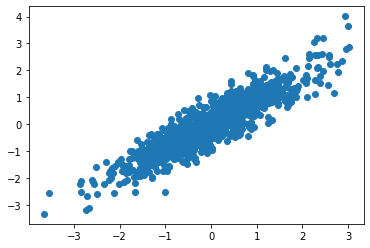

In [39]:
plt.scatter(XY[:,0],XY[:,1])

In [40]:
N = 100
X = np.linspace(-5,5,N)
Y = np.linspace(-5,5,N)
X,Y = np.meshgrid(X,Y)
print(X)
print(Y)
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X
pos[:,:,1] = Y
pos

[[-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 ...
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]]
[[-5.        -5.        -5.        ... -5.        -5.        -5.       ]
 [-4.8989899 -4.8989899 -4.8989899 ... -4.8989899 -4.8989899 -4.8989899]
 [-4.7979798 -4.7979798 -4.7979798 ... -4.7979798 -4.7979798 -4.7979798]
 ...
 [ 4.7979798  4.7979798  4.7979798 ...  4.7979798  4.7979798  4.7979798]
 [ 4.8989899  4.8989899  4.8989899 ...  4.8989899  4.8989899  4.8989899]
 [ 5.         5.         5.        ...  5.         5.         5.       ]]


array([[[-5.       , -5.       ],
        [-4.8989899, -5.       ],
        [-4.7979798, -5.       ],
        ...,
        [ 4.7979798, -5.       ],
        [ 4.8989899, -5.       ],
        [ 5.       , -5.       ]],

       [[-5.       , -4.8989899],
        [-4.8989899, -4.8989899],
        [-4.7979798, -4.8989899],
        ...,
        [ 4.7979798, -4.8989899],
        [ 4.8989899, -4.8989899],
        [ 5.       , -4.8989899]],

       [[-5.       , -4.7979798],
        [-4.8989899, -4.7979798],
        [-4.7979798, -4.7979798],
        ...,
        [ 4.7979798, -4.7979798],
        [ 4.8989899, -4.7979798],
        [ 5.       , -4.7979798]],

       ...,

       [[-5.       ,  4.7979798],
        [-4.8989899,  4.7979798],
        [-4.7979798,  4.7979798],
        ...,
        [ 4.7979798,  4.7979798],
        [ 4.8989899,  4.7979798],
        [ 5.       ,  4.7979798]],

       [[-5.       ,  4.8989899],
        [-4.8989899,  4.8989899],
        [-4.7979798,  4.8989899],
        .

In [41]:
Z = mnormal.pdf(pos) 

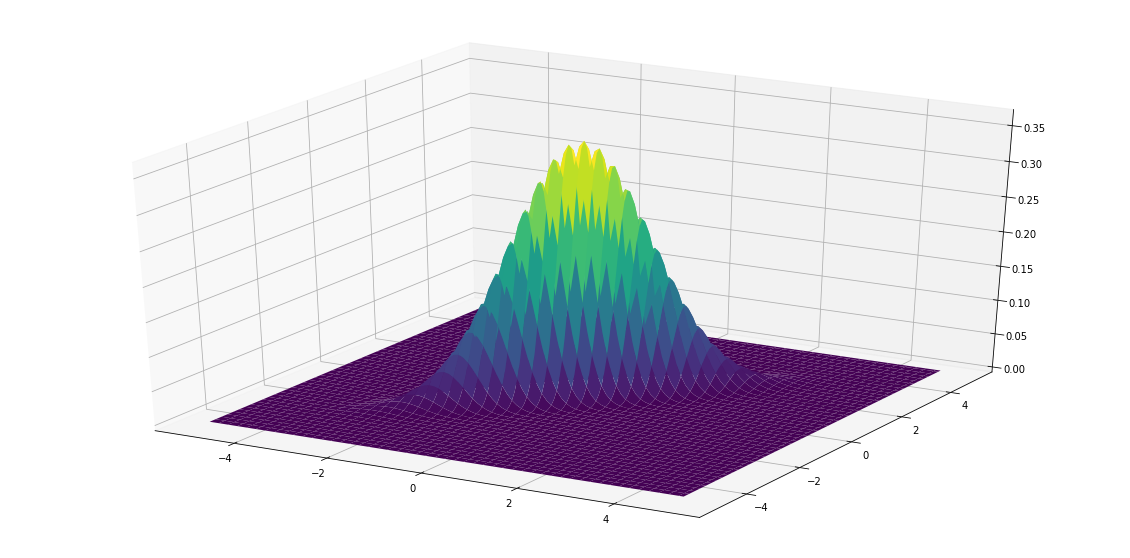

In [42]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca(projection = '3d')
ax.plot_surface(X,Y,Z,linewidth = 1,cmap = cm.viridis)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'origincmap'
  


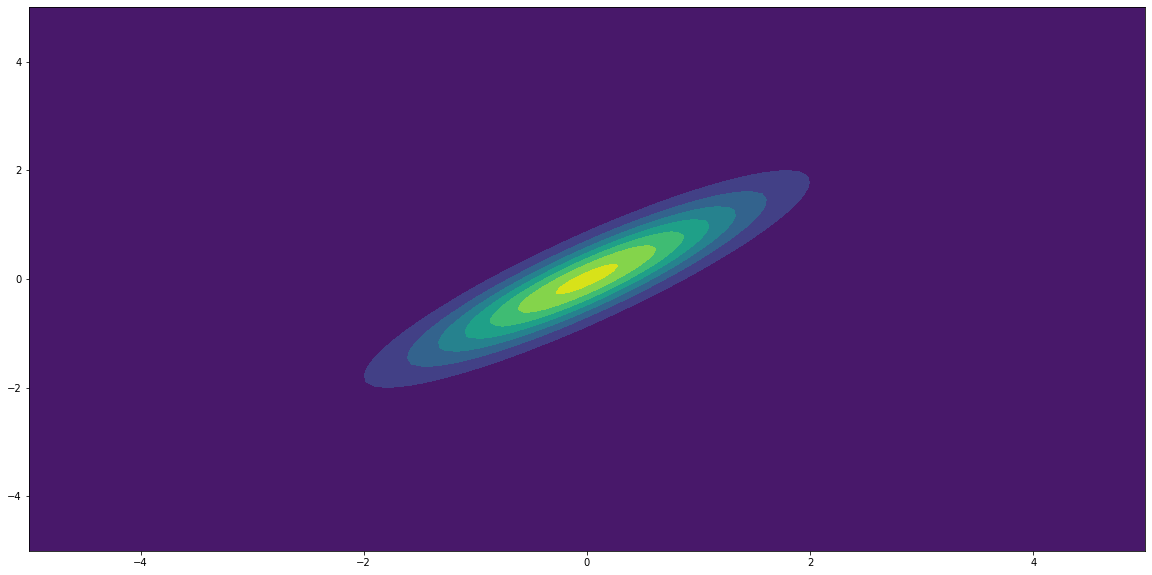

In [43]:
fig,ax = plt.subplots(figsize = (20,10))
ax.contourf(X,Y,Z,origincmap = cm.viridis)

#Kowariancja
Kowariancją zmiennych losowych $X$ i $Y$ nazywamy liczbę $\text{Cov}(X, Y)$ określoną wzorem
\begin{equation*}
    \text{Cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}X)(Y-\mathbb{E}Y) ].
\end{equation*}

Kowariancja może być traktowana jako pewna miara zgodności dwóch zmiennych losowych, będąc średnią wartością iloczynu odchyleń obu zmiennych od ich wartości oczekiwanych. 

Bezpośrednio z definicji wynika, że 
\begin{equation*}
    \text{Cov}(X, Y) = \mathbb{E}(XY) - (\mathbb{E}X)(\mathbb{E}Y).
\end{equation*}

Gdy zmienna losowa $(X, Y)$ jest typu dyskretnego, to
    \begin{equation*}
        \mathbb{E}(XY) = \sum_i\sum_k x_iy_kP(X=x_i, Y=y_k).
    \end{equation*}
Gdy zmienna losowa $(X, Y)$ jest typu ciągłego, to
    \begin{equation*}
        \mathbb{E}(XY) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty} xyf(x,y)dxdy.
    \end{equation*}

Własności:
    

*   Jeżeli $\text{Cov}(X, Y)=0$, to zmienne losowe $X$ i $Y$ nazywamy eskorelowanymi. Wynika stąd, że zmienne losowe niezależne są jednocześnie nieskorelowane, ale zmienne losowe nieskorelowane mogą być zależne.
*   $\text{Var}(X\pm Y) = \text{Var}(X) + \text{Var}(Y) \pm 2\text{Cov}(X, Y)$.
*   $\text{Cov}(aX+b, cY+d) = ac\text{Cov}(X, Y)$.


#Współczynnik korelacji
Współczynnikiem korelacji zmiennych losowych $X$ i $Y$ nazywamy liczbę
\begin{equation*}
    \rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X)}\sqrt{\text{Var}(Y)}}
\end{equation*}
Własności:

*    $|\rho(X, Y)|\leq 1$.
*    Jeżeli zmienne losowe $X$ i $Y$ są niezależne, to $\rho(X, Y)=0$.
*   Dla dowolnych liczb rzeczywistych $a, b, c, d$ zachodzi
    \begin{equation*}
        |\rho(aX+b, cY+d)|=|\rho(X, Y)|.
    \end{equation*}
*    Zmienne losowe $X$ i $Y$ są zależne liniowo wtedy i tylko wtedy, gdy $|\rho(X, Y)|=1$

#Macierz Kowariancji

Niech $(X_1, X_2, \ldots, X_n)$ będzie wektorem losowym (o składowych całkowalnych z kwadratem), wtedy \textbf{macierz kowariancji} jest określona następująco:
\begin{equation*}
    \sum = 
\begin{bmatrix}
\sigma^2_1 & \sigma_{12} & \ldots & \sigma_{1n}\\
\sigma_{21} & \sigma^2_2 & \ldots & \sigma_{2n}\\
\vdots & \ldots & \ddots & \vdots \\
\sigma_{n1} & \sigma_{n2} & \ldots & \sigma^2_n
\end{bmatrix}
\end{equation*}
gdzie:
*    $\sigma_i^2$ jest wariancją zmiennej losowej $X_i$;
*    $\sigma_{ij}=\text{Cov}(X_i, X_j)$ jest kowariancją między zmiennymi losowym $X_i$ oraz $X_j$.

#Wielowymiarowy rozkład normalny
Wektor losowy $(X_1,\ldots, X_n)$ ma rozkład $N$-wymiarowy rozkład normalny z macierzą kowariancji $\sum$ oraz wektorem średnich $\mu$, jeżeli jej gęstość $f$ wyraża się wzorem
\begin{equation*}
    f(x_1, \ldots, x_n) = \frac{1}{\sqrt{(2\pi)^n|\sum|}} \exp\Bigg\{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) \Bigg\}.
\end{equation*}


## Zadanie 3 - Korelacja zmiennych losowych
Wygeneruj $3$-wymiarowy wektor losowy z rozkładu normalnego, tak aby 1 i 2 współrzędne były ze sobą skorelowane, natomiast 1 i 3 oraz 2 i 3 są zmiennymi parami niezależnymi. 

1. Narysuj zależność pomiędzy parami zmiennych (np. możesz użyć funcji `pairplot`)
2. Oblicz współczynnik korelacji Pearsona dla wygenerowanych par zmiennych i narysuj `heatmape`.
3. Powtórz punkty 1 i 2 dla wektora $5$-wymiarowego z rozkładu normalnego, tak aby 1, 3 i 5 współrzędne były ze sobą skorelowane a pozostałe niezależne.

## Zadanie 4 - Centralne twierdzenie graniczne

1. Szacuje się, że w średnia wartość ilorazu inteligencji wynosi 100 z odchyleniem standardowym 15. Jakie jest prawdopodobieństwo, że wśród 30 losowo wybranych osób, ich średni iloraz inteligencji przekroczy 105?

2. Szacuje się, że 60% dorosłych Polaków posiada własny samochód. Jakie jest prawdopodobieństwo, że wśród 1000 osób będzie od 500 do 700 posiadaczy własnego auta?

3. Co dwudziesta młoda osoba w Polsce jest na diecie wegańskiej. Wyznacz prawdopodobieństwo, że wśród 100 młodych Polaków, od 5 do 10 osób będzie na diecie wegańskiej?

4. Szacuje się, że rozkład wieku kobiety w chwili urodzenia pierwszego dziecka jest normalny ze średnią 27 lat i odchyleniu standardowym 4 lata. Jakie jest prawdopodobieństwo, że wśród 100 losowo wybranych kobiet, ich średnia wieku, kiedy urodziły pierwsze dziecko przekroczy 30 lat?

5. Przeprowadzone badania pokazały, że co trzeci dorosły mężczyzna dojeżdża do pracy własnym pojazdem. Jakie jest prawdopodobieństwo, że wśród 300 losowo wybranych mężczyzn co najmniej 80, ale nie więcej niż 120, dojeżdża do pracy własnym pojazdem?

6. Przyjmuje się, że 1\% populacji choruje na schizofrenię. Oblicz prawdopodobieństwo, że wśród losowo wybranych
1000 osób będzie więcej niż 12 cierpiących na to zaburzenie.